In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression,LassoCV
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

In [53]:
%cd /content/drive/MyDrive/AI_ML_CLass/upgrad/PROJETS/

/content/drive/MyDrive/AI_ML_CLass/upgrad/PROJETS


In [54]:
!ls

bike_sharing.csv		      Lending-Case-Study-EDA.ipynb
bike-sharing-data-dict.txt	      lending_loan_data_dictionary.xlsx
Bike-Sharing-Linear-Regression.ipynb  loan.csv


###Reading Data & Understanding Data :

In [55]:
bike_sharing_pd=pd.read_csv("bike_sharing.csv")

In [56]:
bike_sharing_pd.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


 have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	

In [57]:
## rows & cols 
bike_sharing_pd.shape

(730, 16)

In [58]:
bike_sharing_pd.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [59]:
bike_sharing_pd.isna().sum()
## no null value present in data. so we proceed ahead

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### at first look deleting cols :

 * instant col : Since it id column it is not use for prediction 
 * registered and casual : since cnt is the sum of registered and these col will not be available at prediction time.so deleting these 


In [60]:
bike_sharing_pd.drop(columns=['instant','dteday','casual','registered'],axis=1,inplace=True)

In [61]:
bike_sharing_pd.head(4)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562


### handling categorical value :

##### visulize the data :

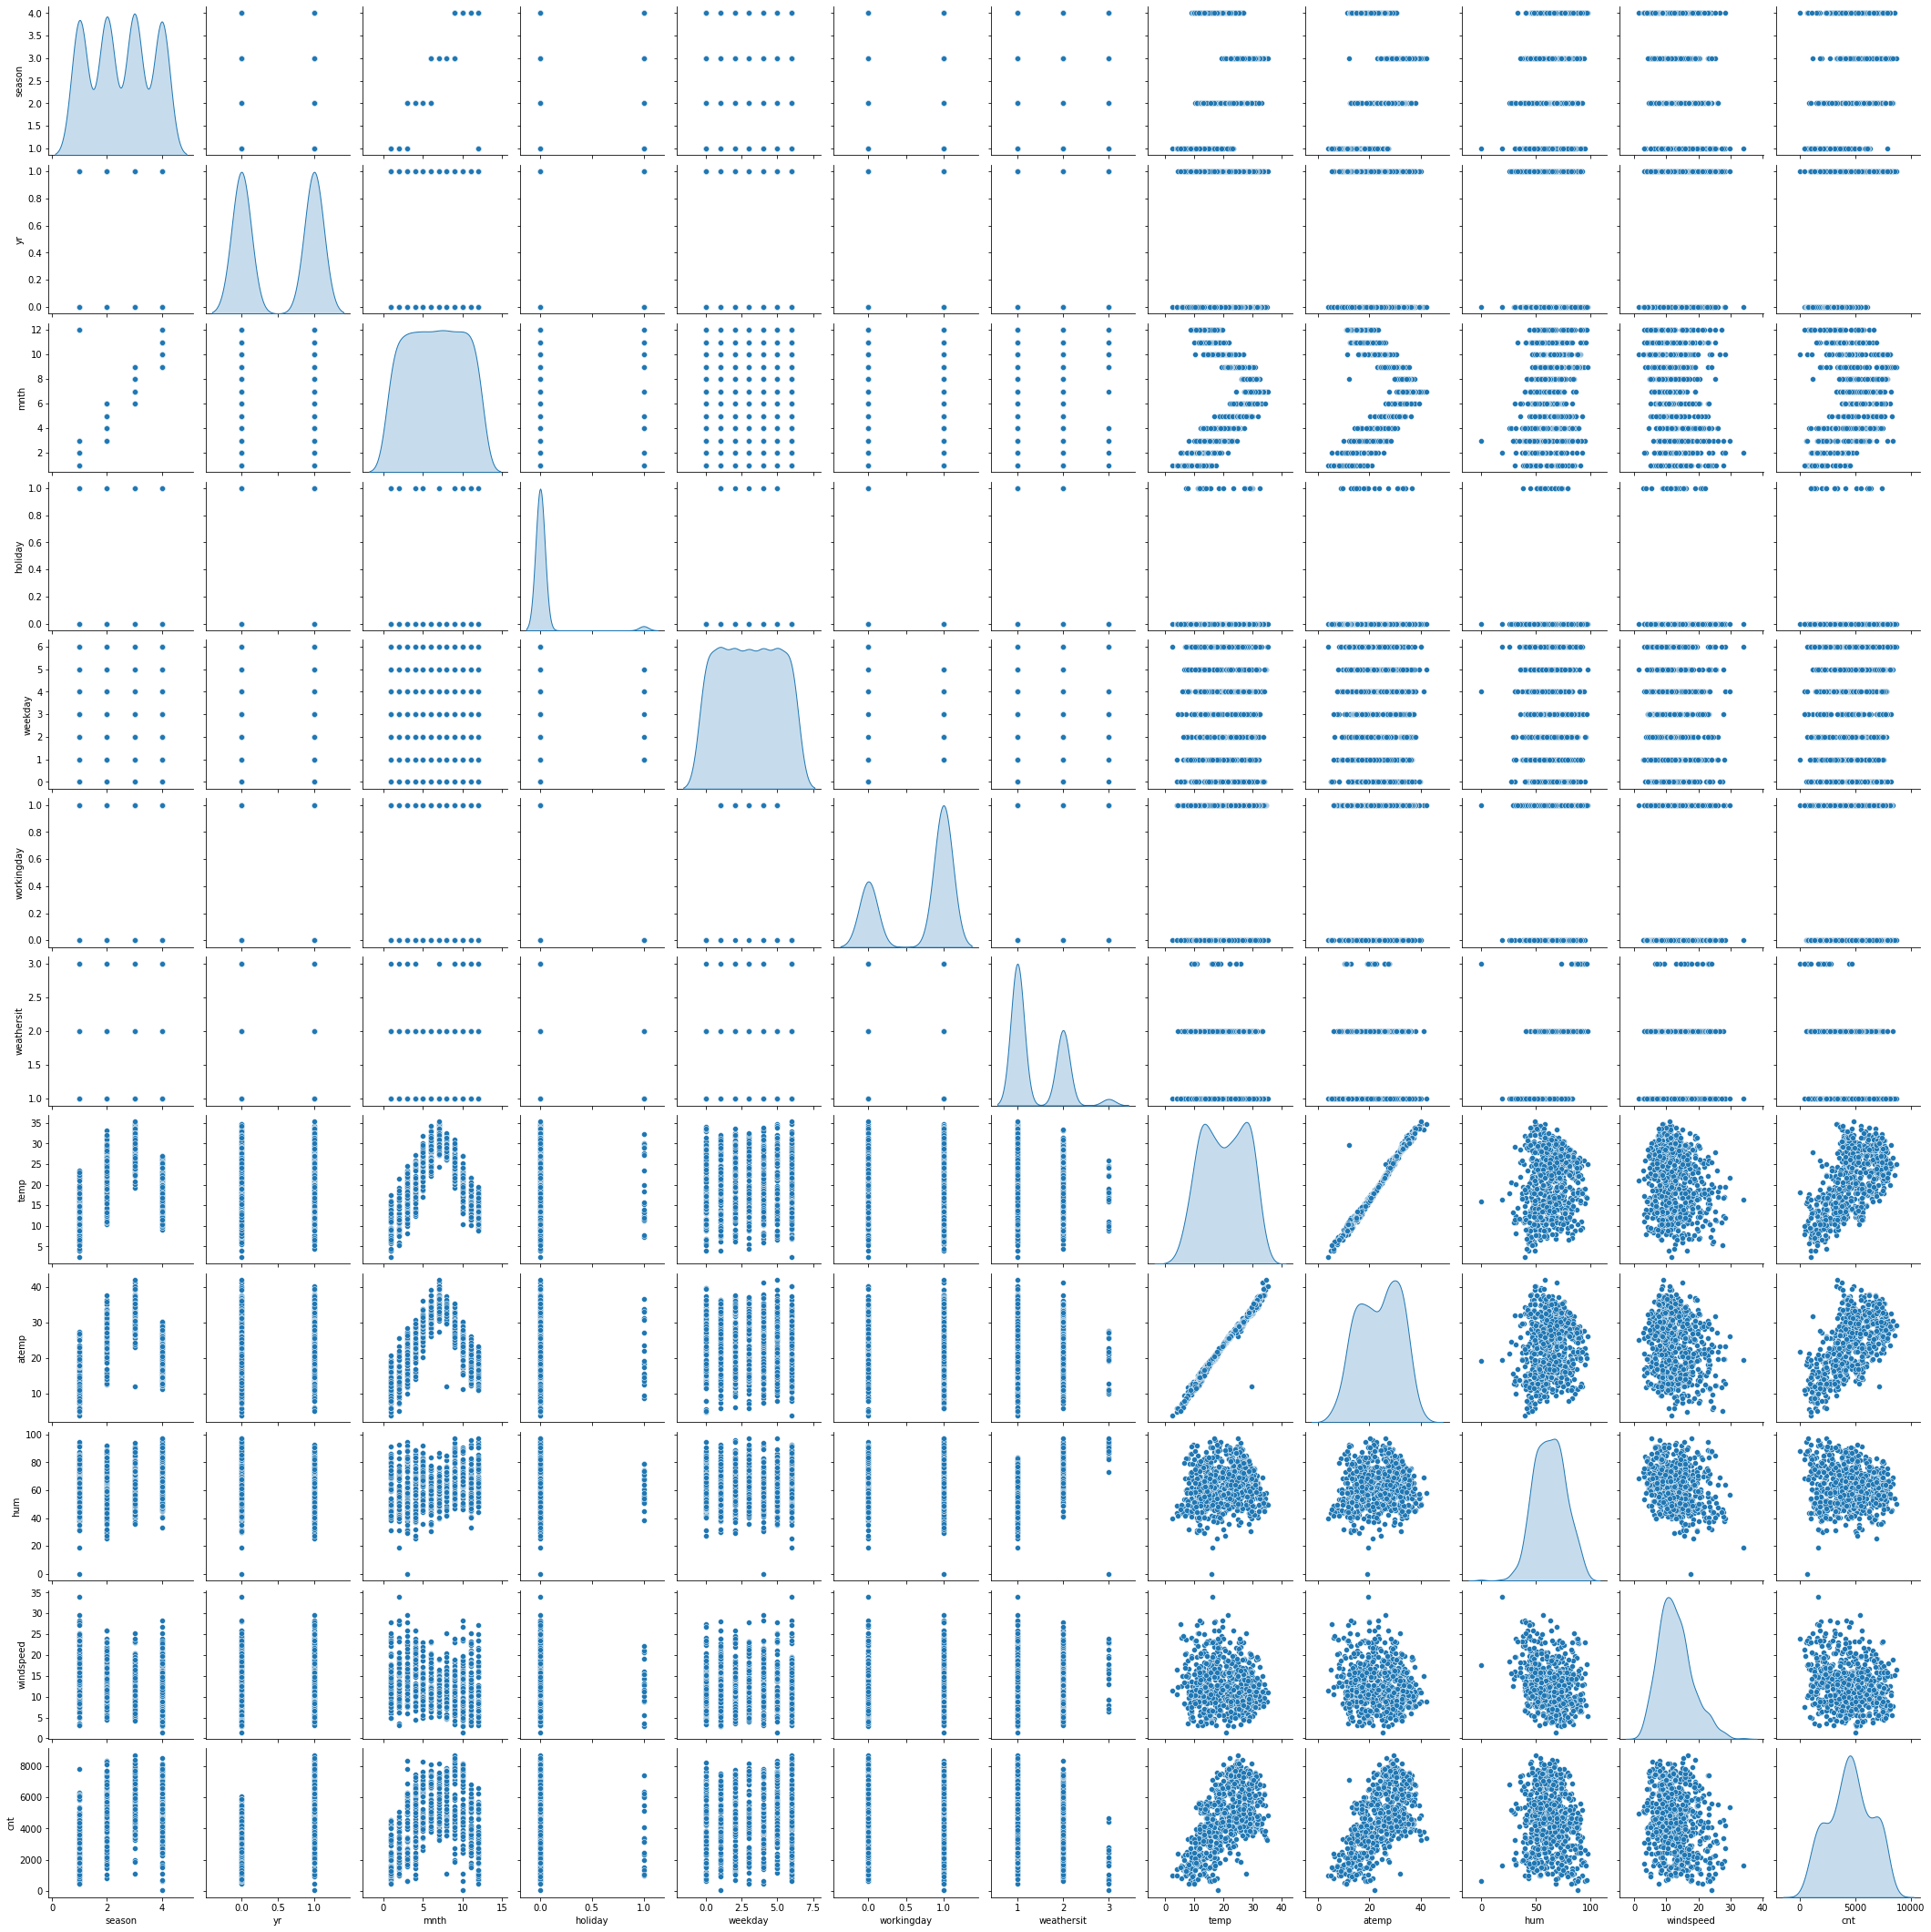

In [62]:
## using pair plot
sns.pairplot(bike_sharing_pd,diag_kind='kde')

 observation :
  
1.   Relationship b/w customer count vs temp is linear. 
2.   we can also see 5 to 10 month is generally high demanding month.
3.   predictor variable temp and atemp are linear dependent to each other.
4.   there is very low demand in snow season and no demand in heavy rainy season.



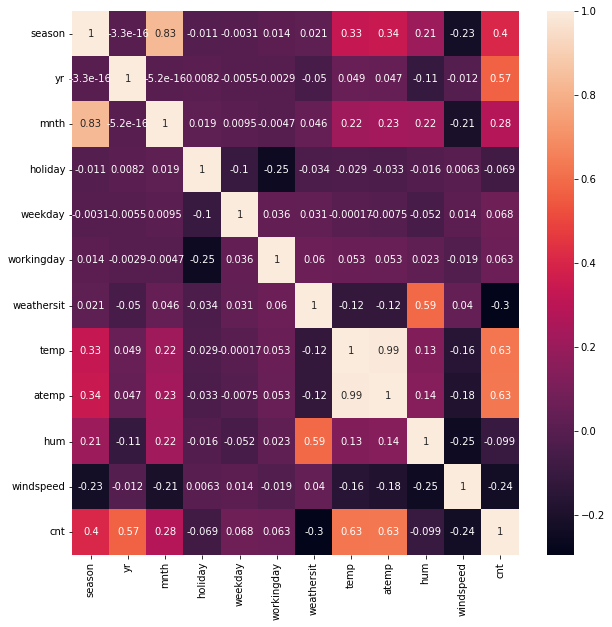

In [63]:
## observing cor-relation b/w dataset
plt.figure(figsize=(10,10))
sns.heatmap(bike_sharing_pd.corr(),annot=True)

observation :

*   There is an almost zero corelation b/w humidity and count.
*   temp and atemp are highly correlated.



In [64]:
## so dropping temp
bike_sharing_pd.drop(columns=['temp'],inplace=True,axis=1)

In [65]:
bike_sharing_pd.head(4)

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562


#### visualizing categorical value v/s Count

**This dataset contains 7 categorical features which are season,year,month,Holiday,weekday,workingday,weathersit**

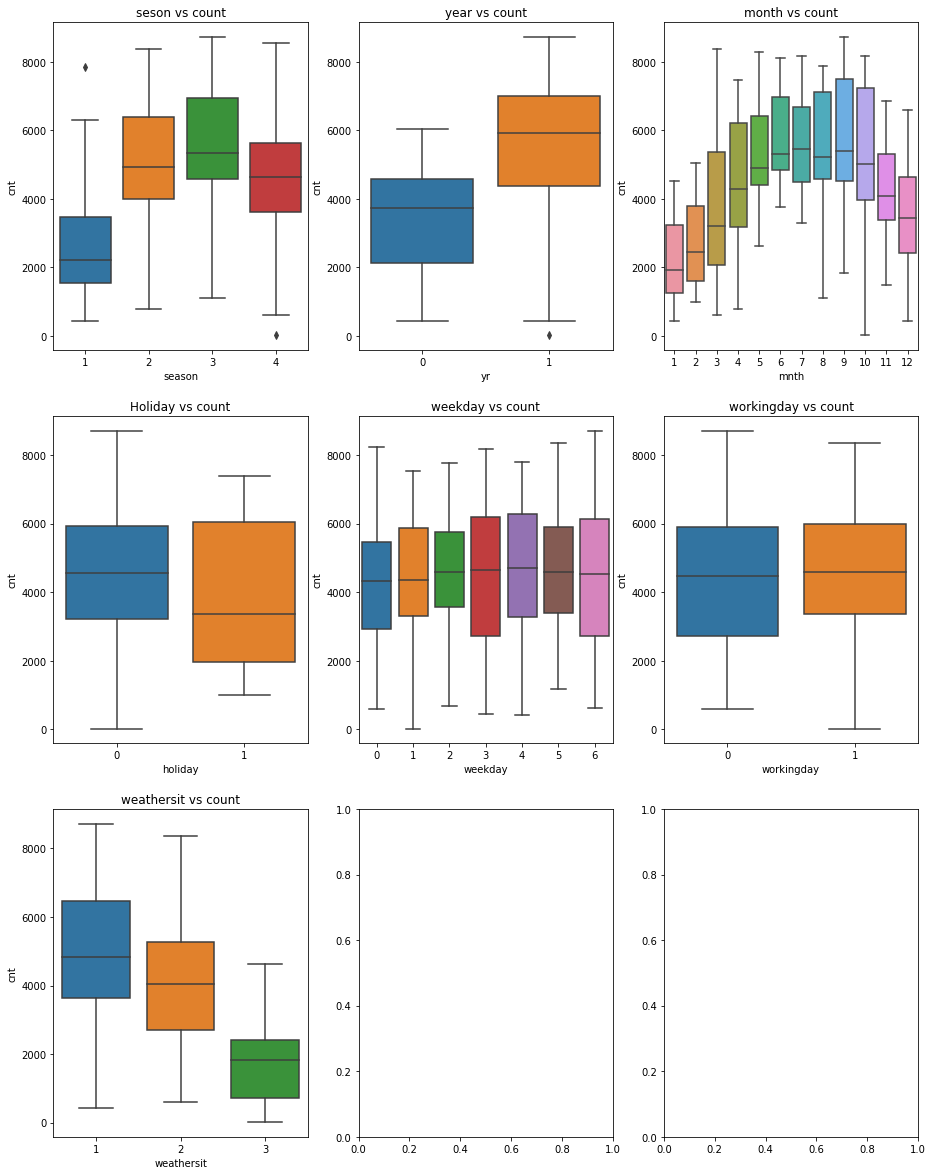

In [66]:
## visualizing categorical value with Count
fig,ax = plt.subplots(nrows=3,ncols=3,sharey=False)

sns.boxplot(data=bike_sharing_pd,x='season',y='cnt',ax=ax[0][0])
ax[0][0].set_title("seson vs count")

sns.boxplot(data=bike_sharing_pd,x='yr',y='cnt',ax=ax[0][1])
ax[0][1].set_title("year vs count")

sns.boxplot(data=bike_sharing_pd,x="mnth",y='cnt',ax=ax[0][2])
ax[0][2].set_title("month vs count")

sns.boxplot(data=bike_sharing_pd,x='holiday',y='cnt',ax=ax[1][0])
ax[1][0].set_title("Holiday vs count")

sns.boxplot(data=bike_sharing_pd,x='weekday',y='cnt',ax=ax[1][1])
ax[1][1].set_title("weekday vs count")

sns.boxplot(data=bike_sharing_pd,x='workingday',y='cnt',ax=ax[1][2])
ax[1][2].set_title("workingday vs count")

sns.boxplot(data=bike_sharing_pd,x='weathersit',y='cnt',ax=ax[2][0])
ax[2][0].set_title("weathersit vs count")

fig.set_size_inches(15.5,20.5,forward=True)

Observation :

1.	There is a low demand in Spring Season compared to summer, fall and winter. Generally, bike sharing demand remain high in summer and fall season.
2.	Popularity of Bike Sharing demand is increasing. Trend is visible. There is a demand increase in 2019 compared to past year 2018.
3.	From starting month to till 10th, In general demand increases then it starts to decline till Jan.
4.	Median of holiday and first Q1 is less than compared to non-holiday median and Q1.
5.	There is very low demand in snow season and no demand in heavy rainy season.




### Preparing Data:


Below are the step to be performed during data preparation steps :
*   Encoding Categorical variable : 

> - creating dummy variable from categorical variable
- creating ordered label encoder if possible. 

*   Train Test Split

*   Rescaling 



##### Dummy Variable of season, month, weekday and weathersit

In [67]:
# convering number into string categorical
import calendar

season_dict={1:"spring",2:"summer",3:"fall",4:"winter"}
month_dict={index: month for index, month in enumerate(calendar.month_abbr) if month}
week_dict ={index:day for index, day in enumerate(calendar.day_name) if day}
weathersit_dict={1:'clear',2:'mist',3:'light_snow',4:'heavy_rain'}

#
bike_sharing_pd.season=bike_sharing_pd.season.map(season_dict)
bike_sharing_pd.mnth=bike_sharing_pd.mnth.map(month_dict)
bike_sharing_pd.weekday=bike_sharing_pd.weekday.map(week_dict)
bike_sharing_pd.weathersit=bike_sharing_pd.weathersit.map(weathersit_dict)

In [68]:
bike_sharing_pd.head(4)

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sunday,0,mist,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Monday,0,mist,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Tuesday,1,clear,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Wednesday,1,clear,10.60610,59.0435,10.739832,1562


In [69]:
## creating dummy variable of season, month, weekday and weathersit with help of panda dummy variable 
## dropping a redundant dummy var
## will not delete weathersit redundant because we already having no value in high rainy season

season_dummy=pd.get_dummies(bike_sharing_pd.season)
season_dummy.drop(columns=['spring'],axis=1,inplace=True)
month_dummy = pd.get_dummies(bike_sharing_pd.mnth,drop_first=True)
week_dummy = pd.get_dummies(bike_sharing_pd.weekday,drop_first=True)
weathersit_dummy=pd.get_dummies(bike_sharing_pd.weathersit)
## concatenate
bike_new_df=pd.concat([bike_sharing_pd,season_dummy,month_dummy,week_dummy,weathersit_dummy],axis=1)
## drop season,mnth,weekday,weathersit column
bike_new_df.drop(columns=['season','mnth','weekday','weathersit'],axis=1,inplace=True)

In [70]:
bike_new_df.head(4)

,yr,holiday,workingday,atemp,hum,windspeed,cnt,fall,summer,winter,...,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,clear,light_snow,mist
0,0,0,0,18.18125,80.5833,10.749882,985,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,0,1,1,0,0


##### EDA After Preparing Data  

In [71]:
bike_new_df.shape

(730, 30)

we have now feature space increase from 15 to 29. Here one variable is target.

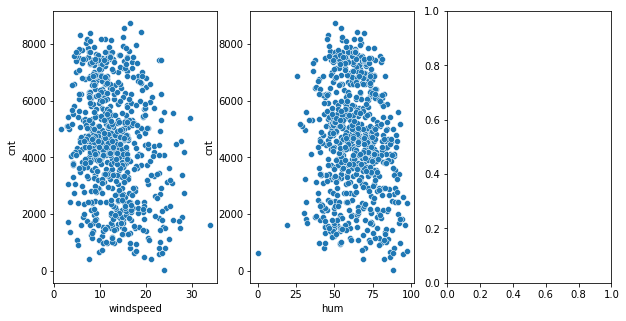

In [72]:
## visualizing categorical value with Count
fig,ax = plt.subplots(ncols=3,sharey=False)

sns.scatterplot(data=bike_new_df,x='windspeed',y='cnt',ax=ax[0])

sns.scatterplot(data=bike_new_df,x='hum',y='cnt',ax=ax[1])
fig.set_size_inches(10,5,forward=True)

In [73]:
bike_new_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000
windspeed,730.0,12.763620,5.195841,1.500244,9.041650,12.125325,15.625589,34.000021
cnt,730.0,4508.006849,1936.011647,22.000000,3169.750000,4548.500000,5966.000000,8714.000000
fall,730.0,0.257534,0.437576,0.000000,0.000000,0.000000,1.000000,1.000000
summer,730.0,0.252055,0.434490,0.000000,0.000000,0.000000,1.000000,1.000000
winter,730.0,0.243836,0.429689,0.000000,0.000000,0.000000,0.000000,1.000000


observation : 

*   Mean and median of windspeed,atemp and humedity are almost similar.



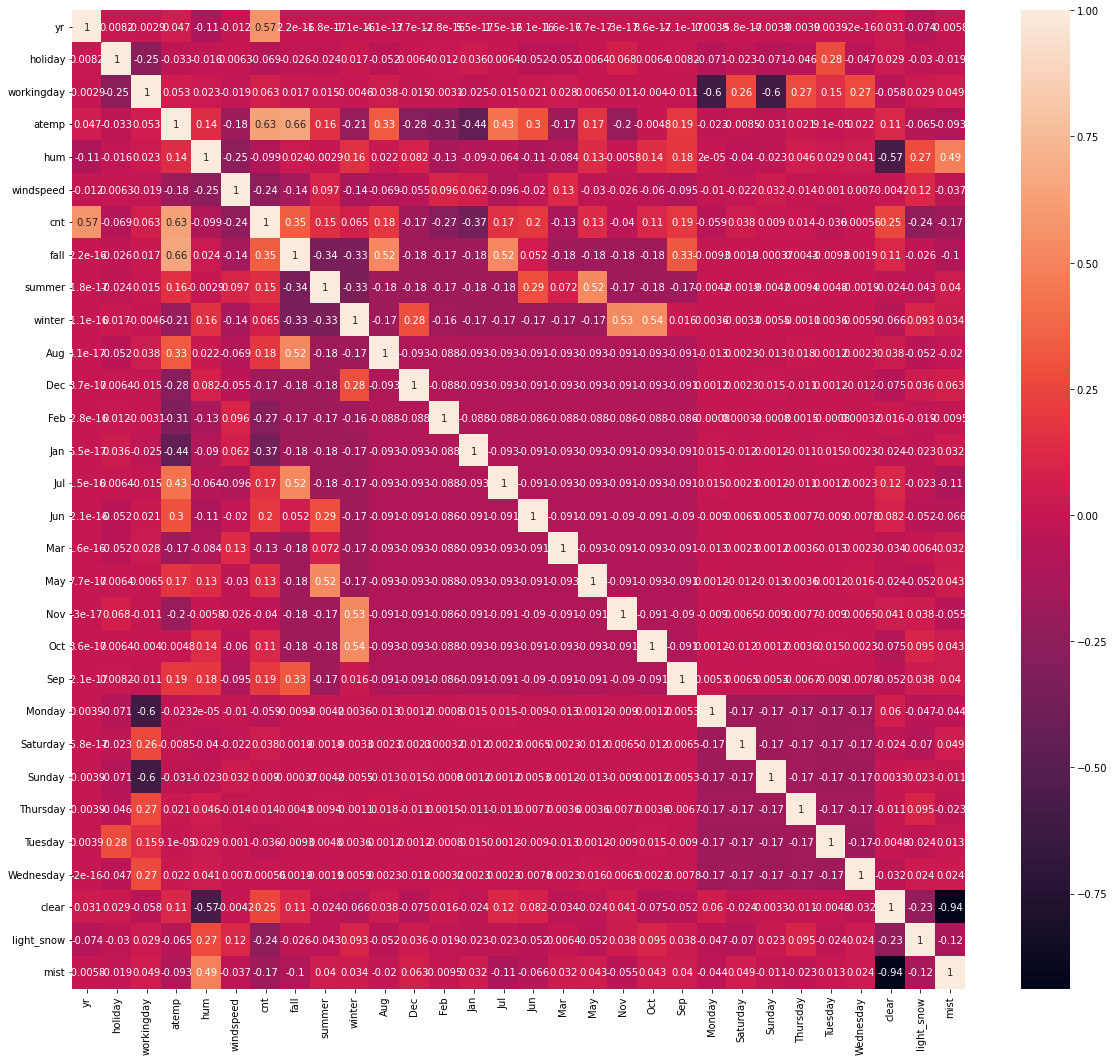

In [74]:
plt.figure(figsize=(20,18))
sns.heatmap(bike_new_df.corr(),annot=True)

##### observation ▶
After looking heat map, there are many predictors variables which are showing zero corelation with target cnt.

we can drop directly if any one having almost zero corelation with cnt.

But here I will RFE method to choose best features from dataset, We can choose top 10 features after seeing corelation matrix.

##### Spliting Train & Test set

In [75]:
df_train,df_test=train_test_split(bike_new_df,train_size=0.75,random_state=40)
# train & test split
print("train shape",df_train.shape)
print("test shape",df_test.shape)

train shape (547, 30)
test shape (183, 30)


##### Scaling Features:

In [76]:
std_scale = StandardScaler()

In [77]:
continuous_features = ['atemp','hum','windspeed','cnt']
## first fit on train dataset and then transform
df_train[continuous_features]=std_scale.fit_transform(df_train[continuous_features])
## sacaling the test data set using same std_scale
df_test[continuous_features]=std_scale.transform(df_test[continuous_features])

In [78]:
df_train.head(4)

,yr,holiday,workingday,atemp,hum,windspeed,cnt,fall,summer,winter,...,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,clear,light_snow,mist
26,0,0,1,-1.571851,0.403236,-0.957725,-2.031626,0,0,0,...,0,0,0,0,0,0,0,1,0,0
641,1,0,1,0.813463,0.653408,-0.910105,1.399846,0,0,1,...,0,0,0,0,0,0,0,0,0,1
56,0,0,0,-1.187940,-0.653361,-0.023887,-1.266423,0,0,0,...,0,0,0,1,0,0,0,1,0,0
383,1,0,1,-1.754075,-0.938851,0.407339,-0.608190,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [79]:
def get_feature_and_target(df) :
  features=df.drop(columns=['cnt'],axis=1)
  target = df['cnt']
  return features,target

In [80]:
## xtrain and ytrain
Xtrain,ytrain=get_feature_and_target(df_train)

In [81]:
## xtest and ytest
Xtest,ytest=get_feature_and_target(df_test)

### Modeling

##### Generic functions

In [82]:
# Generic function to calculate VIF of variables
def vif(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [83]:
## Building model using statsmodel, for the detailed statistics
def train_sm_model(features,target) :
  features_sm=sm.add_constant(features)
  smlr = sm.OLS(target,features_sm).fit()
  return smlr

def predict_from_stat_model(features,ols_model) :
  features_sm=sm.add_constant(features)
  return ols_model.predict(features_sm)

##### let's look model behavior after choosing all features

In [84]:
sm_lr=train_sm_model(Xtrain,ytrain)
print(sm_lr.summary())
## we can see if we choose all variable R-squared and adjusted R-squared value are 0.857 and 0.849

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     115.1
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          1.47e-199
Time:                        04:34:57   Log-Likelihood:                -244.49
No. Observations:                 547   AIC:                             545.0
Df Residuals:                     519   BIC:                             665.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7798      0.081     -9.658      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [85]:
## let's see test data
ypred = predict_from_stat_model(Xtest,sm_lr)
print("r2 score ==>",r2_score(y_true=ytest,y_pred=ypred))
print("mse ==>",mean_squared_error(y_true=ytest,y_pred=ypred))

r2 score ==> 0.7953132586882083
mse ==> 0.14467590533585656


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


observation : 
1. if we build linearRegression model with all features, model will overfit. It means model is too much complex. because there are very less datapoint compare to 30 features.That is why we significant difference b/w test and train data.
2. we can also observe that p value of many features is high. It means those features are not important to model. They are increasing complexity.

##### Choosing top features using RFE

Why I chosen 17 here,it seems there are around 17 features which are somewhat related to cnt after seeing corelation matrix.

In [86]:
lm = LinearRegression()
lm.fit(Xtrain,ytrain)

rfe = RFE(lm,n_features_to_select=17)
rfe = rfe.fit(Xtrain,ytrain)

In [87]:
#List of variables selected in top 111 list

list(zip(Xtrain.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', False, 2),
 ('windspeed', False, 3),
 ('fall', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 9),
 ('Mar', False, 8),
 ('May', False, 4),
 ('Nov', True, 1),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Monday', False, 5),
 ('Saturday', False, 12),
 ('Sunday', True, 1),
 ('Thursday', False, 13),
 ('Tuesday', False, 6),
 ('Wednesday', False, 7),
 ('clear', True, 1),
 ('light_snow', True, 1),
 ('mist', True, 1)]

In [88]:
## features chosen by rfe
imp_features=Xtrain.columns[rfe.support_]
imp_features

Index(['yr', 'holiday', 'workingday', 'atemp', 'fall', 'summer', 'winter',
       'Dec', 'Feb', 'Jan', 'Jul', 'Nov', 'Sep', 'Sunday', 'clear',
       'light_snow', 'mist'],
      dtype='object')

In [89]:
## feature not chosen by rfe 
Xtrain.columns[~rfe.support_]

Index(['hum', 'windspeed', 'Aug', 'Jun', 'Mar', 'May', 'Oct', 'Monday',
       'Saturday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [90]:
Xtrain_rfe =  Xtrain[imp_features]
Xtrain_rfe.head(4)

,yr,holiday,workingday,atemp,fall,summer,winter,Dec,Feb,Jan,Jul,Nov,Sep,Sunday,clear,light_snow,mist
26,0,0,1,-1.571851,0,0,0,0,0,1,0,0,0,0,1,0,0
641,1,0,1,0.813463,0,0,1,0,0,0,0,0,0,0,0,0,1
56,0,0,0,-1.187940,0,0,0,0,1,0,0,0,0,1,1,0,0
383,1,0,1,-1.754075,0,0,0,0,0,1,0,0,0,0,1,0,0


In [91]:
## creating linear Regression model using state.api
sm_lr = train_sm_model(Xtrain_rfe,ytrain)
print("======================================= statistical summary =============================================")
print(sm_lr.summary())
print("======================================= VIF =============================================================")
print(vif(Xtrain_rfe))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


======================================= statistical summary =============================================
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     178.5
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          2.31e-201
Time:                        04:34:57   Log-Likelihood:                -268.96
No. Observations:                 547   AIC:                             571.9
Df Residuals:                     530   BIC:                             645.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

##### Fit & Try again and again

In [92]:
Xtrain_=pd.DataFrame(Xtrain_rfe)

In [93]:
## try : 1
## there are no situation high vif and high p value
## so choosing high p value feature to remove from feature space and try again
## removing feb from which having highest p value
Xtrain_ = Xtrain_.drop(columns=['Feb'])
print("======================================= statistical summary =============================================")
print(sm_lr.summary())
print("======================================= VIF =============================================================")
print(vif(Xtrain_))

======================================= statistical summary =============================================
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     178.5
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          2.31e-201
Time:                        04:34:58   Log-Likelihood:                -268.96
No. Observations:                 547   AIC:                             571.9
Df Residuals:                     530   BIC:                             645.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [94]:
## try : 2
## there are no situation high vif and high p value
## so choosing high p value feature to remove from feature space and try again
## removing Jan from which having highest p value
Xtrain_ = Xtrain_.drop(columns=['Jan'])
print("======================================= statistical summary =============================================")
print(sm_lr.summary())
print("======================================= VIF =============================================================")
print(vif(Xtrain_))

======================================= statistical summary =============================================
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     178.5
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          2.31e-201
Time:                        04:34:58   Log-Likelihood:                -268.96
No. Observations:                 547   AIC:                             571.9
Df Residuals:                     530   BIC:                             645.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [95]:
## try : 2
## there are no situation high vif and high p value
## so choosing high p value feature to remove from feature space and try again
## removing holiday from which having highest p value
Xtrain_ = Xtrain_.drop(columns=['holiday'])
sm_lr = train_sm_model(Xtrain_,ytrain)
print("======================================= statistical summary =============================================")
print(sm_lr.summary())
print("======================================= VIF =============================================================")
print(vif(Xtrain_))

======================================= statistical summary =============================================
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     216.5
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          7.11e-203
Time:                        04:34:58   Log-Likelihood:                -273.66
No. Observations:                 547   AIC:                             575.3
Df Residuals:                     533   BIC:                             635.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [96]:
## try : 3
## there are no situation high vif and high p value
## there are no features with high p value so choosing high vif value 
## removing Jul from which having highest vif value
Xtrain_ = Xtrain_.drop(columns=['Jul'])
sm_lr = train_sm_model(Xtrain_,ytrain)
print("======================================= statistical summary =============================================")
print(sm_lr.summary())
print("======================================= VIF =============================================================")
print(vif(Xtrain_))

======================================= statistical summary =============================================
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     232.2
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          6.33e-203
Time:                        04:34:58   Log-Likelihood:                -276.37
No. Observations:                 547   AIC:                             578.7
Df Residuals:                     534   BIC:                             634.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [97]:
## try : 4
## there are no situation high vif and high p value
## there are no features with high p value so choosing high vif value 
## removing fall from which having highest vif value
Xtrain_ = Xtrain_.drop(columns=['clear'])
sm_lr = train_sm_model(Xtrain_,ytrain)
print("======================================= statistical summary =============================================")
print(sm_lr.summary())
print("======================================= VIF =============================================================")
print(vif(Xtrain_))

======================================= statistical summary =============================================
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     232.2
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          6.33e-203
Time:                        04:34:58   Log-Likelihood:                -276.37
No. Observations:                 547   AIC:                             578.7
Df Residuals:                     534   BIC:                             634.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**we can see all feature do not have high vif also do not have high p value. Now we can build final regression model with these remaing featues.**

##### Final Sklearn Linear Regression Model 

In [98]:
final_features = Xtrain_.columns

In [99]:
# sklearn linear model
Xtrain_ = Xtrain[final_features]
lm = LinearRegression()
lm.fit(Xtrain_,ytrain)
ytr_pred=lm.predict(Xtrain_)
print("train r2 score ==>",r2_score(ytrain,ytr_pred))
print("train mse ==>",mean_squared_error(ytrain,ytr_pred))

train r2 score ==> 0.8391655370799487
train mse ==> 0.16083446292005135


### Model Evaluation :

In [100]:
## let's see test data
Xtest_ = Xtest[final_features]
ypred = lm.predict(Xtest_)
print("test r2 score ==>",r2_score(y_true=ytest,y_pred=ypred))
print("test mse ==>",mean_squared_error(y_true=ytest,y_pred=ypred))

test r2 score ==> 0.7642653802646049
test mse ==> 0.16662104888010862


Text(0, 0.5, 'y_pred')

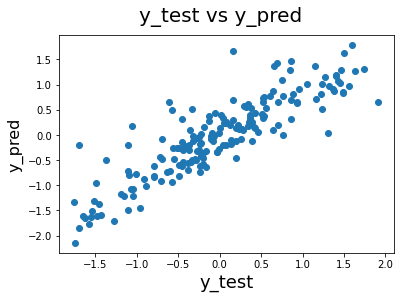

In [101]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(ytest,ypred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)    

#### Residual Analysis :

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


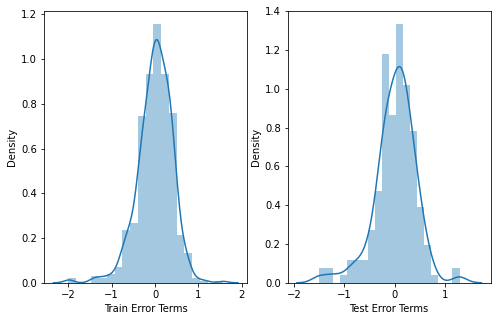

In [109]:
# Plot the histogram of the error terms
fig,ax = plt.subplots(ncols=2,sharey=False)

sns.distplot((ytrain - ytr_pred), bins = 20,ax=ax[0],axlabel='Train Error Terms')
#ax[0].set_title('Train Error Terms')
#ax[0].xlabel('Errors', fontsize = 18)

sns.distplot((ytest - ypred), bins = 20,ax=ax[1],axlabel='Test Error Terms',)
#ax[1].set_title('Test Error Terms')
#ax[0].xlabel('Errors', fontsize = 18)

fig.set_size_inches(8,5,forward=True)

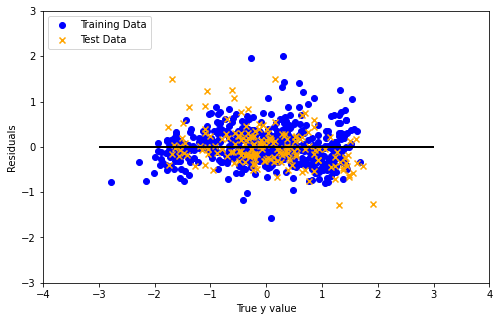

In [110]:
# Plot the the error terms with ytrue
fig = plt.figure(figsize=(8,5))
plt.scatter(ytr_pred,ytr_pred - ytrain,c='blue',marker='o',label='Training Data')
plt.scatter(ytest,ypred - ytest,c='orange',marker='x',label='Test Data')
plt.xlabel('True y value')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-3,xmax=3,lw=2,color='k')
plt.xlim([-4,4])
plt.ylim([-3,3])
plt.show()

Since error term with predicted value of test or train data follow straight line .It is not away from straight line. Homescedicity or curvy is not visible in this plot. So we do not need to acivity to convert non-linear into liner curv

## Advance Techniques :

#### using Lasso Technique as model selection

This is a regularization technique used in feature selection using a Shrinkage method also referred to as the penalized regression method. Lasso is short for Least Absolute Shrinkage and Selection Operator, which is used both for regularization and model selection. If a model uses the L1 regularization technique, then it is called lasso regression.

Lasso can be used for regularization as well as model selection.

Due to the fact that coefficients will be shrunk towards a mean of zero, less important features in a dataset are eliminated when penalized. The shrinkage of these coefficients based on the alpha value provided leads to some form of automatic feature selection, as input variables are removed in an effective approach.

In [111]:
## using lasso for feature selection also using lassocv for cross validation
#Using the linear CV model
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
#Lasso Cross validation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
lasso_model = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10],cv=cv)
lasso_model.fit(Xtrain,ytrain)
#score
print("train r2 score ===>",lasso_model.score(Xtrain, ytrain))
print("test r2 score ===>",lasso_model.score(Xtest, ytest))
print(lasso_model.alpha_)

train r2 score ===> 0.8563907717209519
test r2 score ===> 0.7933749074299408
0.001


In [113]:
## see coefficient of features in lasso regression model
list(zip(Xtrain.columns,lasso_model.coef_))

[('yr', 0.9983559849385624),
 ('holiday', -0.22188832965230398),
 ('workingday', 0.0812619690603453),
 ('atemp', 0.46219714510407856),
 ('hum', -0.10794704868238866),
 ('windspeed', -0.09955198234379464),
 ('fall', 0.3210847141789804),
 ('summer', 0.34930841037237587),
 ('winter', 0.7474048244483239),
 ('Aug', 0.01382202556204075),
 ('Dec', -0.23177764856262734),
 ('Feb', -0.09507294985447529),
 ('Jan', -0.14156235257717578),
 ('Jul', -0.15311729059305867),
 ('Jun', 0.046164686189748665),
 ('Mar', 0.05728369623588678),
 ('May', 0.09922276057433622),
 ('Nov', -0.2605588130327354),
 ('Oct', 0.0),
 ('Sep', 0.3074272644769481),
 ('Monday', -0.10223717135976315),
 ('Saturday', 0.0),
 ('Sunday', 0.14324662968369534),
 ('Thursday', 0.0003358275696722066),
 ('Tuesday', -0.06858690078340897),
 ('Wednesday', -0.05999067859814733),
 ('clear', 0.25241906214931487),
 ('light_snow', -0.7335411967399408),
 ('mist', 0.0)]

In [141]:
## removing features which having coficient almost equal to 0.0
not_imp_feat = ['workingday','hum','Aug','Feb','Jun','May','Mar','Oct',
                'Saturday','Thursday','Tuesday','Wednesday','mist','Jan','Sunday']

In [143]:
## final model after dropping unnessary features 
Xtrain_ = Xtrain.drop(columns=not_imp_feat,axis=1)
Xtest_ = Xtest.drop(columns=not_imp_feat,axis=1)

#fit final model
model = LinearRegression()
model.fit(Xtrain_,ytrain)
# prediction 
ytr_pred=model.predict(Xtrain_)
ypred=model.predict(Xtest_)
#score
print("train data r2_score ==>",model.score(Xtrain_, ytrain))
print("test data r2_score==>",model.score(Xtest_, ytest))

train data r2_score ==> 0.8458387830368135
test data r2_score==> 0.7825404877532192


In [144]:
## stastically varifying model 
sm_lr = train_sm_model(Xtrain_,ytrain)
print("======================================= statistical summary =============================================")
print(sm_lr.summary())
print("======================================= VIF =============================================================")
print(vif(Xtrain_))

======================================= statistical summary =============================================
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     208.5
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          1.96e-205
Time:                        05:16:17   Log-Likelihood:                -264.78
No. Observations:                 547   AIC:                             559.6
Df Residuals:                     532   BIC:                             624.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


This model seems good because Features do not contain high vif and high p value.

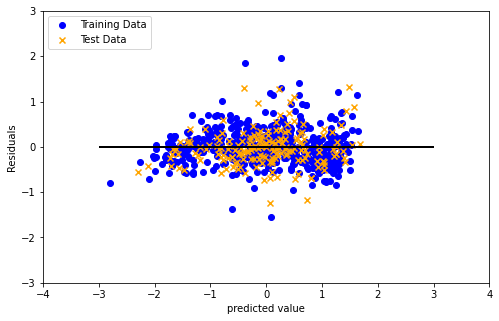

In [124]:
# Plot the the error terms with y_pred
fig = plt.figure(figsize=(8,5))
plt.scatter(ytr_pred,ytr_pred - ytrain,c='blue',marker='o',label='Training Data')
plt.scatter(ypred,ypred - ytest,c='orange',marker='x',label='Test Data')
plt.xlabel('predicted value')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-3,xmax=3,lw=2,color='k')
plt.xlim([-4,4])
plt.ylim([-3,3])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


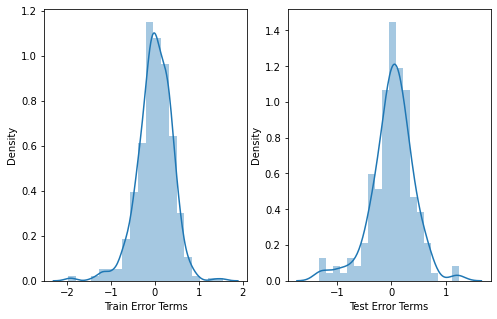

In [125]:
# Plot the histogram of the error terms
fig,ax = plt.subplots(ncols=2,sharey=False)

sns.distplot((ytrain - ytr_pred), bins = 20,ax=ax[0],axlabel='Train Error Terms')

sns.distplot((ytest - ypred), bins = 20,ax=ax[1],axlabel='Test Error Terms',)

fig.set_size_inches(8,5,forward=True)

#### Final Regression Model & It's coefficients of features:

In [145]:
## top important features
features_coef=list(zip(Xtrain_.columns,model.coef_))
features_coef.sort(key = lambda x : abs(x[1]),reverse=True)
features_coef

[('yr', 1.0206414243829516),
 ('light_snow', -0.8661734980410734),
 ('winter', 0.8074606028180111),
 ('summer', 0.46282065814894546),
 ('atemp', 0.44669724269650096),
 ('fall', 0.4218879298755238),
 ('holiday', -0.3923651940912922),
 ('clear', 0.3837105952013626),
 ('Nov', -0.26629807330007077),
 ('Sep', 0.26178870274378996),
 ('Dec', -0.23685216881541),
 ('Monday', -0.1895532040626089),
 ('Jul', -0.18685071526642327),
 ('windspeed', -0.07345981076350092)]

### Experiment :

In [31]:
# since model built on both 2018 and 2019 data set
# but model will not able to work on 2020 future , because dict value is zero for 2019
# so experimenting taking previous last 3 days trend,
# consindering sequence data like time series data
bike_new_df['cnt_last1day']=bike_new_df.cnt.shift(1)
bike_new_df['cnt_last2day']=bike_new_df.cnt.shift(2)
bike_new_df['cnt_last3day']=bike_new_df.cnt.shift(3)
bike_new_df['cnt_last4day']=bike_new_df.cnt.shift(4)

In [21]:
## drop na rows
bike_new_df.dropna(inplace=True)

In [22]:
bike_new_df.head()

,holiday,workingday,atemp,hum,windspeed,cnt,fall,summer,winter,Aug,...,Thursday,Tuesday,Wednesday,clear,light_snow,mist,cnt_last1day,cnt_last2day,cnt_last3day,cnt_last4day
4,0,1,11.46350,43.6957,12.522300,1600,0,0,0,0,...,1,0,0,1,0,0,1562.0,1349.0,801.0,985.0
5,0,1,11.66045,51.8261,6.000868,1606,0,0,0,0,...,0,0,0,1,0,0,1600.0,1562.0,1349.0,801.0
6,0,1,10.44195,49.8696,11.304642,1510,0,0,0,0,...,0,0,0,0,0,1,1606.0,1600.0,1562.0,1349.0
7,0,0,8.11270,53.5833,17.875868,959,0,0,0,0,...,0,0,0,0,0,1,1510.0,1606.0,1600.0,1562.0
8,0,0,5.80875,43.4167,24.250650,822,0,0,0,0,...,0,0,0,1,0,0,959.0,1510.0,1606.0,1600.0


In [ ]:
# removing year from data set
bike_new_df.drop(columns=['yr'],axis=1,inplace=True)

In [24]:
# train and test split
df_train,df_test=train_test_split(bike_new_df,train_size=0.75,random_state=40)
# train & test split
print("train shape",df_train.shape)
print("test shape",df_test.shape)

train shape (544, 33)
test shape (182, 33)


In [32]:
# scaling features
std_scale = StandardScaler()

In [33]:
continuous_features = ['atemp','hum','windspeed','cnt','cnt_last1day','cnt_last2day','cnt_last3day',
                       'cnt_last4day']
## first fit on train dataset and then transform
df_train[continuous_features]=std_scale.fit_transform(df_train[continuous_features])
## sacaling the test data set using same std_scale
df_test[continuous_features]=std_scale.transform(df_test[continuous_features])

In [34]:
## xtrain and ytrain
Xtrain,ytrain=get_feature_and_target(df_train)
## xtest and ytest
Xtest,ytest=get_feature_and_target(df_test)

In [35]:
## using lasso for feature selection also using lassocv for cross validation
#Using the linear CV model
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
#Lasso Cross validation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
lasso_model = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10],cv=cv)
lasso_model.fit(Xtrain,ytrain)
#score
print("train r2 score ===>",lasso_model.score(Xtrain, ytrain))
print("test r2 score ===>",lasso_model.score(Xtest, ytest))
print(lasso_model.alpha_)

train r2 score ===> 0.8403231345436107
test r2 score ===> 0.8122675861865399
0.001


In [36]:
## see coeficient of lasso regression
list(zip(Xtrain.columns,lasso_model.coef_))

[('holiday', -0.12029089012479496),
 ('workingday', 0.13850255919690418),
 ('atemp', 0.15986592860066645),
 ('hum', -0.09038711211966372),
 ('windspeed', -0.09797054361536507),
 ('fall', -0.0),
 ('summer', 0.08004062483021243),
 ('winter', 0.08134370410360782),
 ('Aug', -0.05045914731768616),
 ('Dec', -0.007208815957836427),
 ('Feb', -0.012046031851303214),
 ('Jan', 0.0),
 ('Jul', -0.19725925493199126),
 ('Jun', -0.1489280245059951),
 ('Mar', -0.0),
 ('May', -0.050286403314096444),
 ('Nov', 0.03635722315344766),
 ('Oct', -0.0),
 ('Sep', 0.06147884850369549),
 ('Monday', -0.06644118605660658),
 ('Saturday', -0.051424209743148284),
 ('Sunday', 0.04585099987266537),
 ('Thursday', 0.0),
 ('Tuesday', -0.06975391932911411),
 ('Wednesday', -0.03554482405268257),
 ('clear', 0.24909857373841063),
 ('light_snow', -0.5883633770272866),
 ('mist', 0.0),
 ('cnt_last1day', 0.41126518524513017),
 ('cnt_last2day', 0.1500863187149117),
 ('cnt_last3day', 0.0977354188376006),
 ('cnt_last4day', 0.142127120

In [39]:
## if any coficient almost equal to 0.0, we can remove those column
not_imp_feat = ['hum','windspeed','fall','summer','winter','Aug','Dec','Feb',
                'Jan','Mar','May','Nov','Oct','Sep','Monday','Saturday','Sunday','Thursday',
                'Tuesday','Wednesday','mist','Jun','holiday','cnt_last3day','cnt_last2day',
                'Jul'
                ]
                ## final model after dropping unnessary features 
Xtrain_ = Xtrain.drop(columns=not_imp_feat,axis=1)
Xtest_ = Xtest.drop(columns=not_imp_feat,axis=1)

In [40]:
## stastically varifying model 
sm_lr = train_sm_model(Xtrain_,ytrain)
print("======================================= statistical summary =============================================")
print(sm_lr.summary())
print("======================================= VIF =============================================================")
print(vif(Xtrain_))

======================================= statistical summary =============================================
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     392.0
Date:                Wed, 09 Nov 2022   Prob (F-statistic):          1.46e-192
Time:                        03:04:12   Log-Likelihood:                -314.20
No. Observations:                 544   AIC:                             642.4
Df Residuals:                     537   BIC:                             672.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [41]:
model = LinearRegression()
model.fit(Xtrain_,ytrain)
#score
print("train data ==>",model.score(Xtrain_, ytrain))
print("test data ==>",model.score(Xtest_, ytest))

train data ==> 0.8141323567625045
test data ==> 0.7942289372414117


In [43]:
## see coeficient of regression
list(zip(Xtrain_.columns,model.coef_))

[('workingday', 0.13696442523935273),
 ('atemp', 0.1029242928374217),
 ('clear', 0.30718384332505233),
 ('light_snow', -0.6983100940821583),
 ('cnt_last1day', 0.5775733670048355),
 ('cnt_last4day', 0.2440007739322494)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

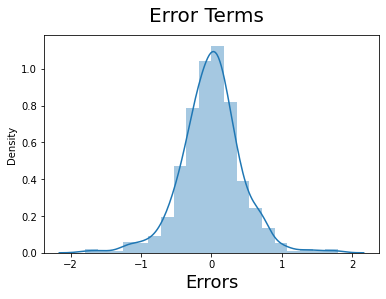

In [44]:
# Plot the histogram of the error terms
fig = plt.figure()
ytr_pred=model.predict(Xtrain_)
sns.distplot((ytrain - ytr_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

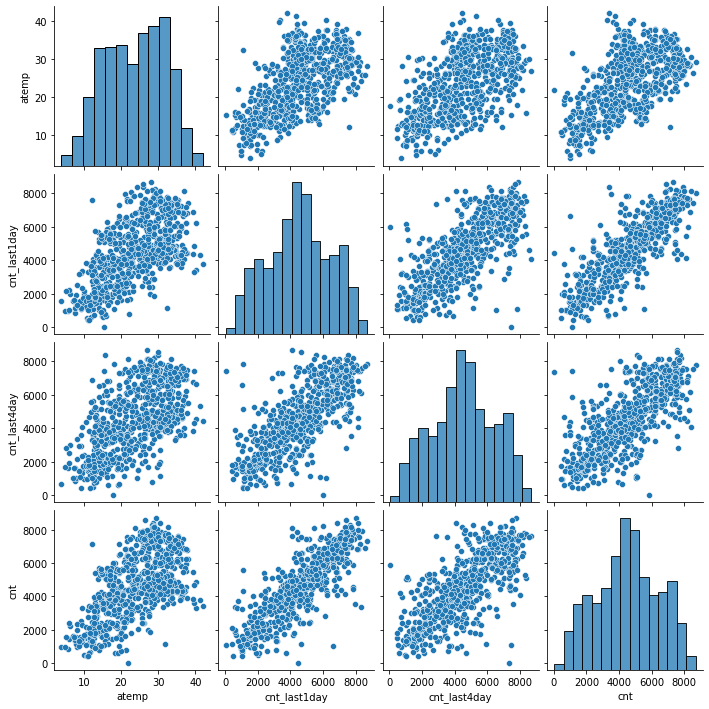

In [46]:
sns.pairplot(bike_new_df[['atemp','cnt_last1day','cnt_last4day','cnt']])

## Conclusion :

1. This case study is about to solve problem of forcasting of demand basis of given data.
2. During EDA, we use different plots to understand distribution of data, to understand relation b/w features in term how much they are corelated to each other. also performed such activity which determines linear dependent features to target variable.
3. Then we performed preprocessing step before start modeling. In this step we split the data into train and test and use standard scale to scale the continuous columns.
4. In model building , initally we followed traditional methods, first we choosed all features to build model. then we varify significane label by looking at P value of each features.
5. we use RFE to select top 17 features then we kept remvoing single feature in every try which come across below situation.
  - Remove first high VIF and High P value.
  - Keep Removing first Low VIF and High P value.
  - then finally Removing high VIF and low p value.
6. We also use adavance feature selection technique which is lasso. I know lasso can be used both purpose l1 regularization and model feature selection. I felt this model perfomed better than earlier point 5 technique.
7. I also performed an experiment. What I found we are building model with only two value of year 2018 and 2019 to follow the trend. Big Question is that if I am Building this model for 2020 , will this model behave correctly because we do not have corresponding encode value of year 2020. So follow trend I used lag data for previous four days. because yt follows yt-1 or yt-2 or yt-3 or yt-3. 
8. When I created model with this, these is no problem of overfit problem. Model bahaved much more correctly for test data.
9. It is somewhat time-series analysis like breaking components into trend, seasonal and errors.


